# **Experiment Notebook**



In [344]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [345]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [347]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [348]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [349]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [350]:
business_use_case_description = """The objective of this project is to develop a machine learning model capable of accurately predicting the likelihood of rainfall exactly seven days in advance in Sydney, Australia. The model is constructed using carefully selected input features derived from historical daily weather data spanning the period from 2010 to 2024. A range of classification algorithms will be applied to this dataset, and the model demonstrating the highest performance based on appropriate evaluation metrics will be selected for deployment as an API. Once operational, this predictive service will enable end users to retrieve rain forecasts, thereby supporting more informed planning and decision-making. This is particularly valuable for industries that are sensitive to weather variability, including agriculture, logistics and event management. By integrating AI forecasting capabilities into its service offerings, this project strengthens Open Meteo’s platform and delivers enhanced value to its customers."""

In [351]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [352]:
business_objectives = """An accurate rainfall prediction model can provide significant benefits to a wide range of stakeholders. Reliable forecasts enable better planning and resource allocation, helping weather-dependent industries minimise disruptions, reduce unnecessary costs and enhance worker safety. Additionally, accurate predictions improve public awareness and preparedness for unexpected rain events. Conversely, inaccurate predictions may lead to serious consequences. False positives can cause unnecessary operational delays and financial losses, while false negatives may pose safety risks to workers and result in missed opportunities for proactive measures."""

In [353]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [354]:
stakeholders_expectations_explanations = """The rainfall predictions will be used to support informed decision-making across various contexts. Individuals can use the forecasts to plan their weekends and outdoor activities accordingly, while event planners and project managers can schedule tasks to minimise disruptions caused by rain. Weather-dependent industries such as agriculture, event planning and logistics will rely on these predictions for careful operational planning to reduce risks and improve safety by avoiding outdoor work during rainy periods. The users of these predictions include the general public, industry professionals, event organisers, and others whose activities are affected by weather conditions. Ultimately, these forecasts will impact a wide range of stakeholders by enabling better planning, minimising disruptions, reducing financial losses, and enhancing overall safety."""

In [355]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [356]:
import openmeteo_requests

import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.8678,
	"longitude": 151.2073,
	"start_date": "2010-01-01",
	"end_date": "2024-12-31",
	"daily": ["relative_humidity_2m_mean", "cloud_cover_mean", "cloud_cover_max", "cloud_cover_min", "wind_gusts_10m_mean", "wind_speed_10m_mean", "dew_point_2m_mean", "wet_bulb_temperature_2m_mean", "pressure_msl_mean", "vapour_pressure_deficit_max", "shortwave_radiation_sum", "temperature_2m_max", "temperature_2m_min", "rain_sum", "precipitation_hours", "pressure_msl_max", "pressure_msl_min", "weather_code", "temperature_2m_mean", "wind_gusts_10m_max", "wind_speed_10m_max", "wind_direction_10m_dominant", "et0_fao_evapotranspiration"],
	"timezone": "auto",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone: {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_relative_humidity_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_cloud_cover_mean = daily.Variables(1).ValuesAsNumpy()
daily_cloud_cover_max = daily.Variables(2).ValuesAsNumpy()
daily_cloud_cover_min = daily.Variables(3).ValuesAsNumpy()
daily_wind_gusts_10m_mean = daily.Variables(4).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(5).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(6).ValuesAsNumpy()
daily_wet_bulb_temperature_2m_mean = daily.Variables(7).ValuesAsNumpy()
daily_pressure_msl_mean = daily.Variables(8).ValuesAsNumpy()
daily_vapour_pressure_deficit_max = daily.Variables(9).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(10).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(11).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(12).ValuesAsNumpy()
daily_rain_sum = daily.Variables(13).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
daily_pressure_msl_max = daily.Variables(15).ValuesAsNumpy()
daily_pressure_msl_min = daily.Variables(16).ValuesAsNumpy()
daily_weather_code = daily.Variables(17).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(18).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(19).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(20).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(21).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(22).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["cloud_cover_mean"] = daily_cloud_cover_mean
daily_data["cloud_cover_max"] = daily_cloud_cover_max
daily_data["cloud_cover_min"] = daily_cloud_cover_min
daily_data["wind_gusts_10m_mean"] = daily_wind_gusts_10m_mean
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean
daily_data["wet_bulb_temperature_2m_mean"] = daily_wet_bulb_temperature_2m_mean
daily_data["pressure_msl_mean"] = daily_pressure_msl_mean
daily_data["vapour_pressure_deficit_max"] = daily_vapour_pressure_deficit_max
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["rain_sum"] = daily_rain_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["pressure_msl_max"] = daily_pressure_msl_max
daily_data["pressure_msl_min"] = daily_pressure_msl_min
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration

df = pd.DataFrame(data = daily_data)
df

Coordinates: -33.84885787963867°N 151.1955108642578°E
Elevation: 51.0 m asl
Timezone: b'Australia/Sydney'b'GMT+10'
Timezone difference to GMT+0: 36000s


,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,rain_sum,precipitation_hours,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,19.672583,20.643309,1011.920837,...,3.9,12.0,1014.099976,1009.500000,53.0,22.964251,35.639999,18.581022,331.647491,2.459723
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,20.716331,21.520597,1007.470764,...,8.6,14.0,1011.000000,1003.900024,63.0,23.612165,37.439999,15.584300,298.610291,4.571662
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,15.066335,16.673801,1015.529236,...,1.1,7.0,1019.500000,1011.099976,51.0,19.882996,37.439999,18.345877,146.744644,2.140701
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,15.185082,17.092829,1019.012390,...,0.6,4.0,1020.700012,1017.200012,51.0,20.887167,37.439999,16.870138,69.884773,3.498662
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,17.505919,19.079020,1015.891663,...,0.0,0.0,1018.299988,1013.000000,3.0,22.520498,39.239998,17.477621,35.137077,5.620671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,16.254166,19.730782,1003.516663,...,0.8,3.0,1007.299988,1000.500000,53.0,26.202085,56.880001,24.012972,339.781250,6.296452
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,15.570831,17.523623,1009.345947,...,0.9,8.0,1011.400024,1007.200012,51.0,21.352081,48.239998,20.170443,109.408127,5.180197
5476,2024-12-28 14:00:00+00:00,63.680096,7.166667,44.0,0.0,27.345001,10.361734,13.604167,17.012634,1014.200012,...,0.0,0.0,1018.500000,1011.000000,1.0,22.214584,45.360001,17.727943,136.802414,6.468780
5477,2024-12-29 14:00:00+00:00,70.827507,41.833332,100.0,6.0,31.214998,12.572087,16.718752,18.610620,1017.649963,...,0.3,2.0,1020.500000,1015.099976,51.0,22.462500,42.839996,18.252037,84.956360,5.375723


In [357]:
# Shape of df
df.shape

(5479, 24)

In [358]:
# Statistical summary of df
df.describe(include='all')

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,rain_sum,precipitation_hours,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
count,5479,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,...,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2017-07-01 14:00:00+00:00,72.654137,48.330826,86.124474,13.687900,25.832382,11.929917,12.133822,14.199195,1017.243774,...,2.424877,3.938493,1020.107849,1014.585876,29.703960,17.532633,40.348118,19.133251,180.656982,3.306324
min,2009-12-31 14:00:00+00:00,23.854151,0.000000,0.000000,0.000000,8.579999,3.419965,-2.077083,3.809179,992.712463,...,0.000000,0.000000,997.099976,986.700012,0.000000,7.439583,12.599999,5.116561,0.100736,0.336328
25%,2013-10-01 02:00:00+00:00,66.318722,23.979167,86.000000,0.000000,19.395000,8.544684,8.374665,10.711050,1012.702148,...,0.000000,0.000000,1015.799988,1009.700012,3.000000,13.964417,31.319998,14.255272,83.010368,2.155062
50%,2017-07-01 14:00:00+00:00,74.287651,47.791668,100.000000,1.000000,24.269997,10.986862,12.349667,14.193513,1017.220764,...,0.100000,1.000000,1020.099976,1014.599976,51.000000,17.627083,39.239998,18.345877,182.750000,3.118238
75%,2021-04-01 02:00:00+00:00,80.749683,72.125000,100.000000,17.000000,30.832497,14.487136,16.277958,17.753678,1021.937500,...,1.650000,6.000000,1024.300049,1019.599976,53.000000,20.952957,47.519997,22.930048,272.036301,4.321402
max,2024-12-30 14:00:00+00:00,95.974464,100.000000,100.000000,100.000000,76.215004,37.387234,22.862501,24.301146,1037.358276,...,138.400009,24.000000,1039.000000,1036.099976,65.000000,30.516668,102.239998,48.782322,359.857452,9.643431
std,NaN,10.850102,29.580282,26.172167,24.294523,8.798209,4.588791,5.014907,4.271924,6.725579,...,6.730367,5.837746,6.278851,7.236078,26.370205,4.203393,12.579881,6.547507,103.372292,1.471949


In [359]:
# Summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          5479 non-null   datetime64[ns, UTC]
 1   relative_humidity_2m_mean     5479 non-null   float32            
 2   cloud_cover_mean              5479 non-null   float32            
 3   cloud_cover_max               5479 non-null   float32            
 4   cloud_cover_min               5479 non-null   float32            
 5   wind_gusts_10m_mean           5479 non-null   float32            
 6   wind_speed_10m_mean           5479 non-null   float32            
 7   dew_point_2m_mean             5479 non-null   float32            
 8   wet_bulb_temperature_2m_mean  5479 non-null   float32            
 9   pressure_msl_mean             5479 non-null   float32            
 10  vapour_pressure_deficit_max   5479 n

### C.2 Define Target variable

In [360]:
# Create a variable 'precipitation_in_7_days', which is the rain_sum up by 7 days from a given date
df['precipitation_in_7_days'] = df['rain_sum'].shift(-7)

# Create the target variable: 1 if it will rain (precipitation > 1 mm), else 0
df['rain_or_not'] = df['precipitation_in_7_days'].apply(lambda x: 1 if x > 1 else 0)

In [361]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,precipitation_in_7_days,rain_or_not
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0.0,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,0.3,0
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,8.020833,13.132172,1011.550049,...,1015.700012,1007.700012,3.0,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,0
5472,2024-12-24 14:00:00+00:00,64.223015,0.916667,8.0,0.0,27.209997,9.999595,13.904166,16.614202,1015.845886,...,1017.700012,1014.200012,0.0,21.368750,51.119999,20.690605,57.746136,6.146514,NaN,0
5473,2024-12-25 14:00:00+00:00,74.374580,13.125000,99.0,0.0,37.109997,15.707917,17.331251,19.040123,1011.941711,...,1016.299988,1007.099976,3.0,22.552084,62.639996,28.227304,37.269981,6.264203,NaN,0
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,16.254166,19.730782,1003.516663,...,1007.299988,1000.500000,53.0,26.202085,56.880001,24.012972,339.781250,6.296452,NaN,0
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,15.570831,17.523623,1009.345947,...,1011.400024,1007.200012,51.0,21.352081,48.239998,20.170443,109.408127,5.180197,NaN,0
5476,2024-12-28 14:00:00+00:00,63.680096,7.166667,44.0,0.0,27.345001,10.361734,13.604167,17.012634,1014.200012,...,1018.500000,1011.000000,1.0,22.214584,45.360001,17.727943,136.802414,6.468780,NaN,0
5477,2024-12-29 14:00:00+00:00,70.827507,41.833332,100.0,6.0,31.214998,12.572087,16.718752,18.610620,1017.649963,...,1020.500000,1015.099976,51.0,22.462500,42.839996,18.252037,84.956360,5.375723,NaN,0
5478,2024-12-30 14:00:00+00:00,74.040428,60.375000,100.0,0.0,25.004995,9.582100,17.837500,19.490635,1014.466614,...,1015.700012,1013.099976,3.0,22.993752,40.320000,14.934577,65.856026,5.312834,NaN,0


In [362]:
# Drop rows where 'precipitation_in_7_days' is null
df.dropna(subset=['precipitation_in_7_days'], inplace=True)

In [363]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,precipitation_in_7_days,rain_or_not
5462,2024-12-14 14:00:00+00:00,84.068214,67.500000,100.0,4.0,27.000000,10.344865,20.489584,21.375288,1011.487549,...,1014.500000,1008.700012,51.0,23.512499,43.199997,16.645864,157.912140,5.106747,0.2,0
5463,2024-12-15 14:00:00+00:00,79.673569,32.166668,100.0,0.0,33.929996,13.842854,20.516665,21.684248,1012.604187,...,1015.099976,1010.099976,51.0,24.477083,56.519997,24.845869,52.272655,5.735040,0.0,0
5464,2024-12-16 14:00:00+00:00,71.048088,36.958332,100.0,0.0,40.530003,15.718639,19.547915,21.555021,1007.416565,...,1011.700012,1003.400024,3.0,25.910418,69.479996,31.241796,80.651131,6.822017,0.0,0
5465,2024-12-17 14:00:00+00:00,71.002708,75.416664,100.0,17.0,54.720001,24.286615,14.162499,16.170174,1016.062561,...,1019.299988,1010.900024,65.0,19.789583,70.199997,31.368582,172.928391,4.245400,0.0,0
5466,2024-12-18 14:00:00+00:00,60.617496,47.625000,99.0,5.0,36.255001,15.245507,11.972916,15.045041,1017.699951,...,1019.400024,1016.099976,51.0,20.035418,49.680000,20.696869,169.499146,5.528263,0.0,0
5467,2024-12-19 14:00:00+00:00,65.657463,13.125000,71.0,0.0,26.100004,9.855006,12.733334,15.322675,1012.229187,...,1015.799988,1009.099976,2.0,19.704168,39.959999,15.227830,176.653732,5.755971,0.8,0
5468,2024-12-20 14:00:00+00:00,70.268272,19.916666,100.0,0.0,24.494997,9.155691,15.616666,17.714354,1008.329102,...,1010.900024,1006.200012,51.0,21.762499,39.959999,16.856689,107.162010,5.834490,0.9,0
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0.0,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,0.3,0
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,8.020833,13.132172,1011.550049,...,1015.700012,1007.700012,3.0,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,0


In [364]:
# Drop column 'precipitation_in_7_days'
df.drop(columns=['precipitation_in_7_days'], inplace=True)

In [365]:
target_definition_explanations = """This project aims to develop a predictive model to determine whether it will rain in Sydney exactly seven days after a given date, framed as a binary classification problem. To achieve this, a new variable, precipitation_in_7_days, is created to represent the precipitation amount occurring seven days ahead of each observation date. By setting a threshold of greater than 1mm of precipitation, a target variable called rain_or_not is defined, where values above 1mm are labeled as 1 (indicating rain) and values equal to or below 1mm are labeled as 0 (indicating no rain). The model specifically focuses on rainfall events substantial enough to affect daily activities while excluding very light or negligible precipitation that is unlikely to have a meaningful impact."""

In [366]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [367]:
target_name = 'rain_or_not'

### C.4 Explore Target variable

In [368]:
# Number of unique values of target variable
df['rain_or_not'].value_counts()

rain_or_not
0    3822
1    1650
Name: count, dtype: int64

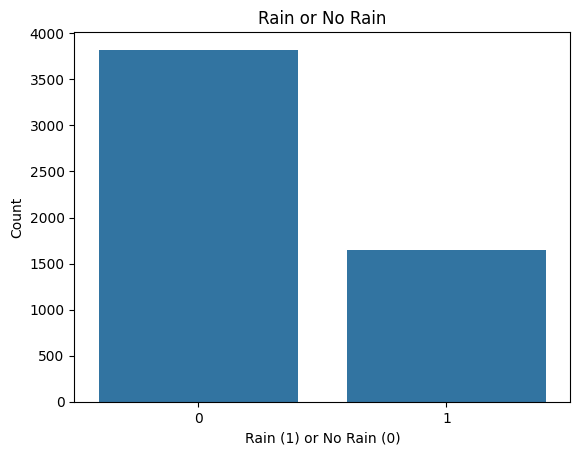

In [369]:
# Distribution of rain_or_not
sns.countplot(x='rain_or_not', data=df)
plt.title('Rain or No Rain')
plt.xlabel('Rain (1) or No Rain (0)')
plt.ylabel('Count')
plt.show()

In [370]:
target_distribution_explanations = """The target variable, rain_or_not, is imbalanced, with a significantly higher number of rain instances (3822) compared to no-rain instances (1650). This imbalance can cause the model to become biased toward predicting the majority class (rain), potentially leading to poor identification of no-rain events. Consequently, relying solely on accuracy as a performance metric is insufficient, and more balanced metrics such as the F1-score and precision-recall should be prioritised to better assess the model’s effectiveness. To address this imbalance, techniques like stratified data splitting should be employed to maintain consistent class distributions across dataset, while methods such as class weighting during training can help the model generalise better to the minority class."""

In [371]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `temperature_2m_mean `

In [372]:
df['temperature_2m_mean'].describe()

count    5472.000000
mean       17.525978
std         4.201603
min         7.439583
25%        13.963730
50%        17.618583
75%        20.939852
max        30.516668
Name: temperature_2m_mean, dtype: float64

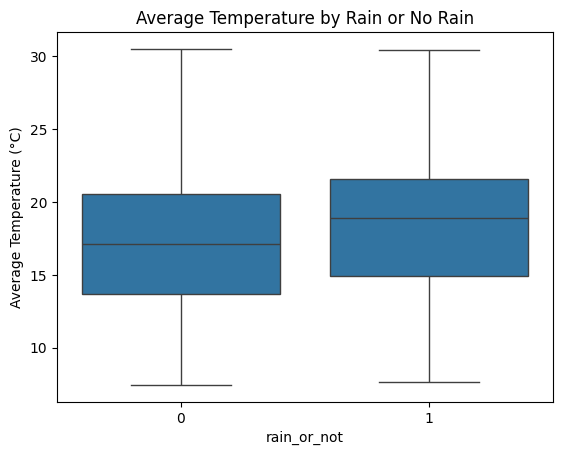

In [373]:
# Distribution of Average Temperature by Rain or No Rain
sns.boxplot(x='rain_or_not', y='temperature_2m_mean', data=df)
plt.title('Average Temperature by Rain or No Rain')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [374]:
feature_1_insights = """The analysis of average temperature on days preceding rainfall shows that these days generally exhibit a slightly higher median temperature, along with increased lower and upper quartile values, compared to days not followed by rain. This suggests a subtle association where warmer conditions may increase the likelihood of rainfall occurring seven days later in Sydney. However, the difference in temperature distributions between rainy and non-rainy days is relatively minor, indicating that average temperature alone is not a strong predictor of future rainfall. The limited distinction between the two groups underscores the difficulty of relying solely on this feature for accurate rainfall prediction."""

In [375]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `relative_humidity_2m_mean`

In [376]:
df['relative_humidity_2m_mean'].describe()

count    5472.000000
mean       72.660187
std        10.853833
min        23.854151
25%        66.325823
50%        74.309856
75%        80.753048
max        95.974464
Name: relative_humidity_2m_mean, dtype: float64

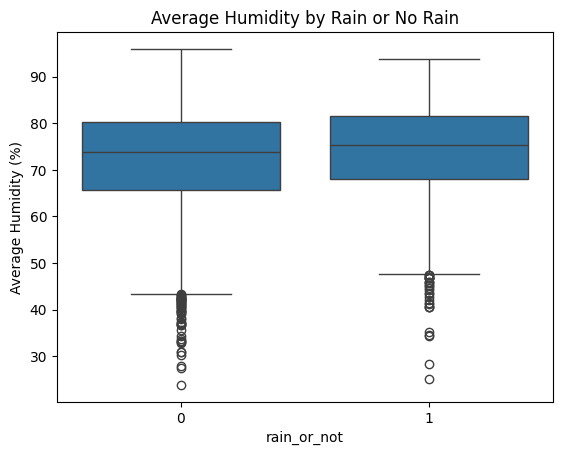

In [377]:
# Distribution of Average Humidity by Rain or No Rain
sns.boxplot(x='rain_or_not', y='relative_humidity_2m_mean', data=df)
plt.title('Average Humidity by Rain or No Rain')
plt.ylabel('Average Humidity (%)')
plt.show()

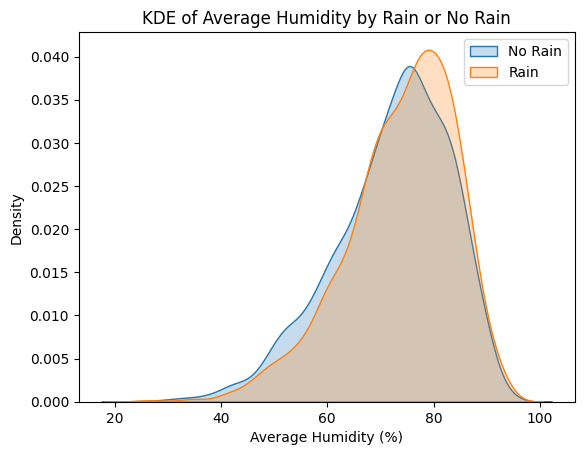

In [378]:
# KDE plot of relative_humidity_2m_mean
sns.kdeplot(data=df[df['rain_or_not']==0]['relative_humidity_2m_mean'], label='No Rain', shade=True)
sns.kdeplot(data=df[df['rain_or_not']==1]['relative_humidity_2m_mean'], label='Rain', shade=True)
plt.title('KDE of Average Humidity by Rain or No Rain')
plt.xlabel('Average Humidity (%)')
plt.legend()
plt.show()

In [379]:
feature_2_insights = """An analysis of the relative_humidity_2m_mean feature reveals only a slight difference in distribution between days followed by rain and those that are not. Both the boxplot and KDE plot suggest a subtle trend in which no-rain days tend to have lower humidity levels, while rain days are associated with slightly higher humidity. However, this distinction is not clearly defined. The KDE plot, in particular, reveals a significant overlap between the two classes, indicating that any association between relative humidity and rainfall occurring seven days later is weak. As such, while this feature may contribute marginally to the model’s predictive capability, it lacks strong discriminatory power on its own and would need to be used in conjunction with other, more informative variables."""

In [380]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `cloud_cover_mean `


In [381]:
df['cloud_cover_mean'].describe()

count    5472.000000
mean       48.355961
std        29.581888
min         0.000000
25%        24.000000
50%        47.791668
75%        72.166664
max       100.000000
Name: cloud_cover_mean, dtype: float64

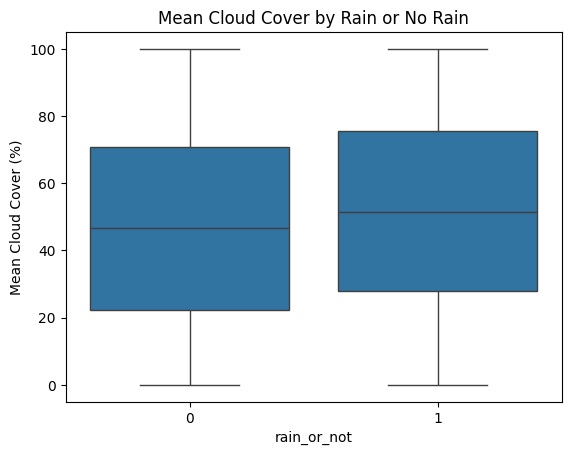

In [382]:
# Distribution of Mean Cloud Cover by Rain or No Rain
sns.boxplot(x='rain_or_not', y='cloud_cover_mean', data=df)
plt.title('Mean Cloud Cover by Rain or No Rain')
plt.ylabel('Mean Cloud Cover (%)')
plt.show()

In [383]:
feature_3_insights = """The cloud_cover_mean feature shows a slightly higher median and interquartile range on days followed by rain compared to no-rain days, suggesting a weak positive relationship between increased cloud cover and upcoming rainfall. This aligns with meteorological understanding, as cloud formation often precedes precipitation. However, the overlap in distributions indicates limited discriminatory power. Due to its variability and potential noise, cloud cover should be used alongside other features to improve predictive accuracy for rainfall events seven days in advance."""

In [384]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.8 Explore Feature of Interest `shortwave_radiation_sum`

In [385]:
df['shortwave_radiation_sum'].describe()

count    5472.000000
mean       16.798746
std         7.127212
min         0.810000
25%        11.280000
50%        15.810000
75%        22.280001
max        33.660000
Name: shortwave_radiation_sum, dtype: float64

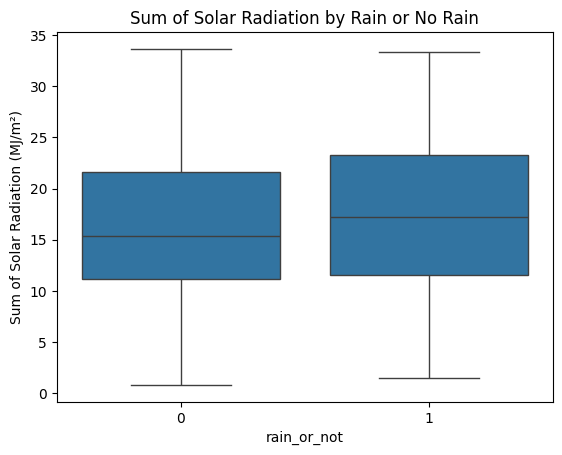

In [386]:
# Distribution of Sum of Solar Radiation by Rain or No Rain
sns.boxplot(x='rain_or_not', y='shortwave_radiation_sum', data=df)
plt.title('Sum of Solar Radiation by Rain or No Rain')
plt.ylabel('Sum of Solar Radiation (MJ/m²)')
plt.show()

In [387]:
feature_4_insights = """The shortwave_radiation_sum feature displays a slightly higher median and interquartile range on days followed by rain compared to those that are not, as observed in the boxplot. This finding appears counterintuitive, since rainfall is typically associated with lower solar radiation due to increased cloud cover. However, this may indicate a lagged atmospheric effect, where higher radiation levels on a given day are linked to atmospheric conditions that eventually lead to rainfall. While this pattern suggests that shortwave radiation may hold some predictive value, its indirect relationship to rain events limits its effectiveness as a standalone feature."""

In [388]:
# Do not modify this code
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

---
## D. Feature Selection


### D.1 Approach "Correlation Analysis"


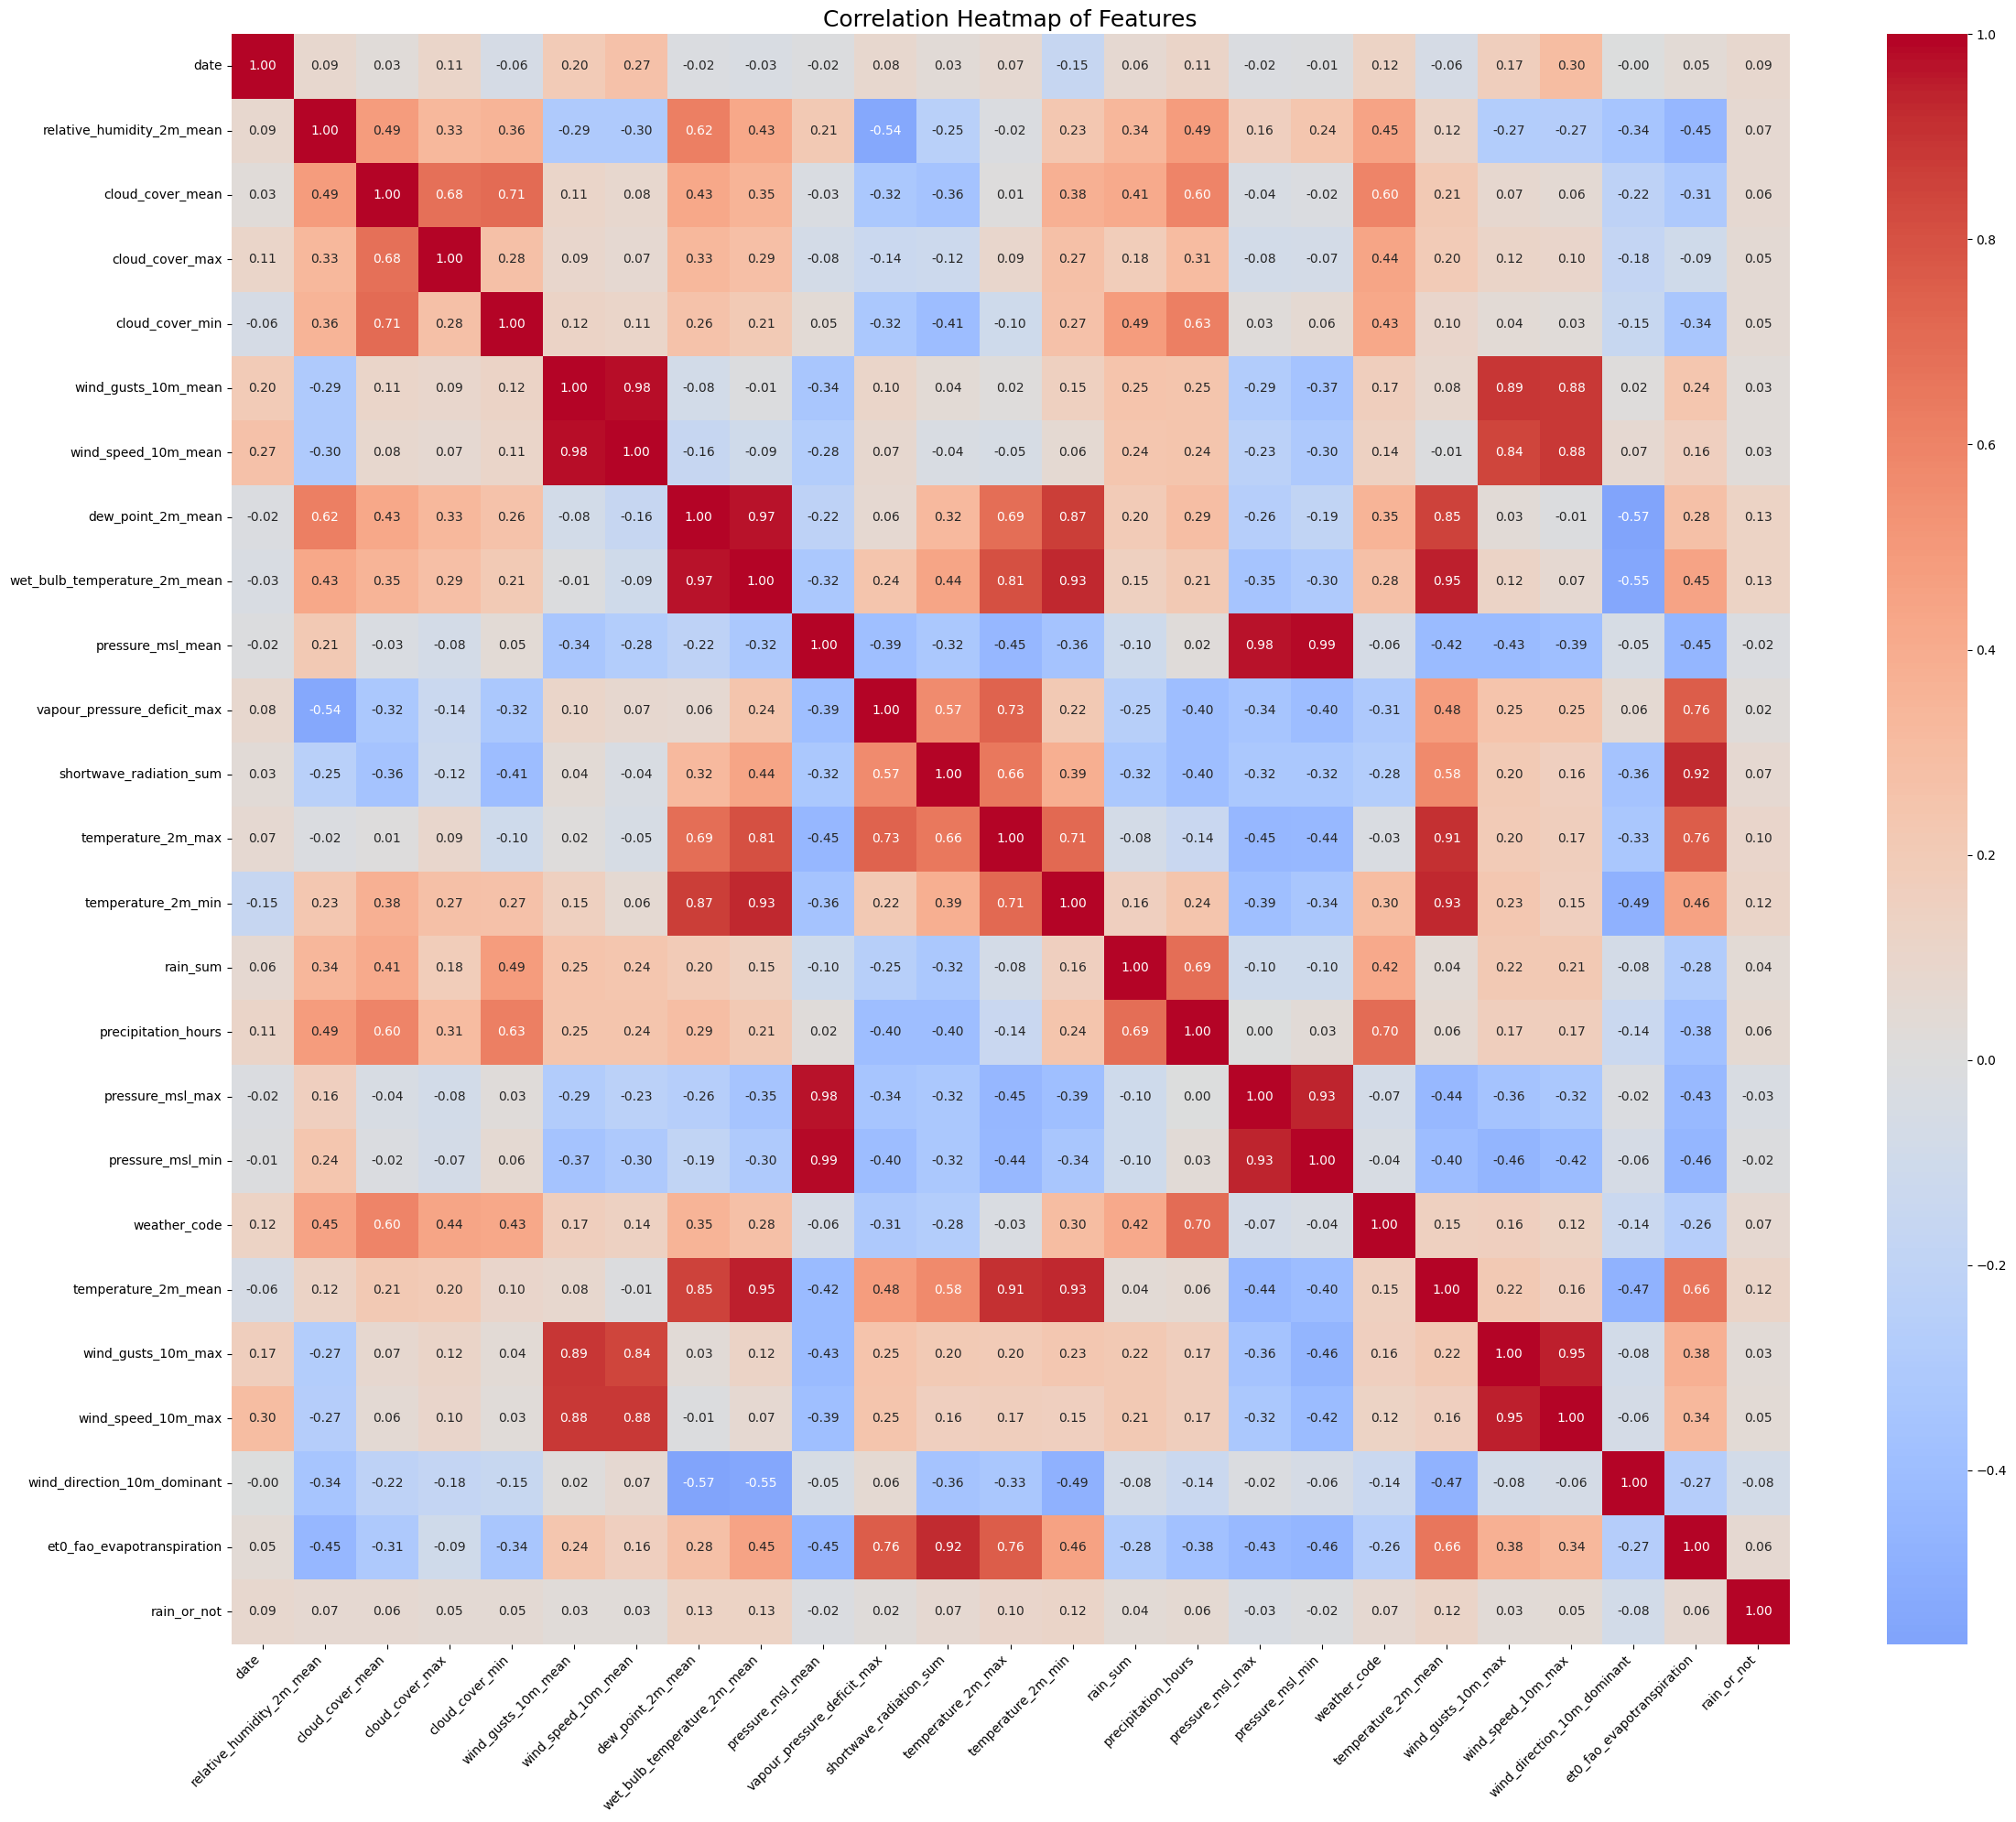

In [389]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(24, 20)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [390]:
# Correlation between numerical features and target variable
from scipy.stats import pointbiserialr

correlations = {}
for col in df.select_dtypes(include=['float32']).columns:
    corr, _ = pointbiserialr(df[col], df['rain_or_not'])
    correlations[col] = corr

# Sort by strength of correlation
sorted_corr = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print top correlated features
for feature, corr in sorted_corr.items():
    print(f"{feature}: {corr:.3f}")

wet_bulb_temperature_2m_mean: 0.128
dew_point_2m_mean: 0.128
temperature_2m_mean: 0.116
temperature_2m_min: 0.115
temperature_2m_max: 0.097
wind_direction_10m_dominant: -0.080
relative_humidity_2m_mean: 0.068
weather_code: 0.067
shortwave_radiation_sum: 0.065
et0_fao_evapotranspiration: 0.064
cloud_cover_mean: 0.063
precipitation_hours: 0.057
cloud_cover_min: 0.053
cloud_cover_max: 0.050
wind_speed_10m_max: 0.049
rain_sum: 0.039
wind_gusts_10m_max: 0.035
pressure_msl_max: -0.031
wind_gusts_10m_mean: 0.028
wind_speed_10m_mean: 0.027
vapour_pressure_deficit_max: 0.024
pressure_msl_mean: -0.023
pressure_msl_min: -0.015


In [391]:
feature_selection_1_insights = """The feature selection process combines domain knowledge with exploratory data analysis, while final decisions are deferred until model-based feature importance evaluation. Correlation analysis reveals multicollinearity among temperature and pressure variables, but these features are retained to allow the creation of derived variables such as temperature_range and pressure_range. Similar overlaps exist among humidity and wind features, which are also kept for further assessment. Point-biserial correlation is used to assess linear relationships with the target variable, however, since it does not capture non-linear effects, no features are excluded based solely on this metric. Overall, the feature set remains broad to capture both linear and non-linear signals, with final selection guided by model-driven feature importance."""

In [392]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## E. Data Preparation

In [393]:
df_clean = df.copy()
df_clean

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,precipitation_hours,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_or_not
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,19.672583,20.643309,1011.920837,...,12.0,1014.099976,1009.500000,53.0,22.964251,35.639999,18.581022,331.647491,2.459723,0
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,20.716331,21.520597,1007.470764,...,14.0,1011.000000,1003.900024,63.0,23.612165,37.439999,15.584300,298.610291,4.571662,0
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,15.066335,16.673801,1015.529236,...,7.0,1019.500000,1011.099976,51.0,19.882996,37.439999,18.345877,146.744644,2.140701,0
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,15.185082,17.092829,1019.012390,...,4.0,1020.700012,1017.200012,51.0,20.887167,37.439999,16.870138,69.884773,3.498662,0
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,17.505919,19.079020,1015.891663,...,0.0,1018.299988,1013.000000,3.0,22.520498,39.239998,17.477621,35.137077,5.620671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2024-12-19 14:00:00+00:00,65.657463,13.125000,71.0,0.0,26.100004,9.855006,12.733334,15.322675,1012.229187,...,0.0,1015.799988,1009.099976,2.0,19.704168,39.959999,15.227830,176.653732,5.755971,0
5468,2024-12-20 14:00:00+00:00,70.268272,19.916666,100.0,0.0,24.494997,9.155691,15.616666,17.714354,1008.329102,...,2.0,1010.900024,1006.200012,51.0,21.762499,39.959999,16.856689,107.162010,5.834490,0
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1.0,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,0.0,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,0


---
## F. Feature Engineering

### F.1 New Feature "temperature_range"


In [394]:
df_clean['temperature_range'] = df_clean['temperature_2m_max'] - df_clean['temperature_2m_min']

In [395]:
df_clean.drop(columns=['temperature_2m_max', 'temperature_2m_min'], inplace=True)

In [396]:
feature_engineering_1_explanations = """Since there is a relationship between temperature and the likelihood of rainfall (rain_or_not), creating a new feature that captures the temperature range, calculated by subtracting the minimum temperature from the maximum, which can provide additional insight into daily temperature variability. This feature helps reduce multicollinearity between highly correlated variables like temperature_max and temperature_min, which can, in turn, enhance the model’s predictive performance and interpretability."""

In [397]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Month"




In [398]:
df_clean['month'] = df_clean['date'].dt.month

In [399]:
feature_engineering_2_explanations = """Mapping the month from the date column is important because rainfall patterns often follow seasonal trends. Extracting the month captures these variations, which can improve predictive performance by enabling the model to make more informed distinctions based on seasonal context."""

In [400]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "pressure_range"

In [401]:
df_clean['pressure_range'] = df_clean['pressure_msl_max'] - df_clean['pressure_msl_min']

In [402]:
df_clean.drop(columns=['pressure_msl_max', 'pressure_msl_min'], inplace=True)

In [403]:
feature_engineering_3_explanations = """Since pressure_msl_max, pressure_msl_min and pressure_msl_mean are highly correlated, a new feature, pressure_range, is engineered by subtracting pressure_msl_min from pressure_msl_max. This transformation serves two main purposes. First, it captures the daily variability in atmospheric pressure, which may provide a more meaningful signal for weather dynamics than individual values alone. Second, by replacing two highly correlated features with a single derived metric, this step helps to reduce multicollinearity, which can improve model stability and interpretability. As a result, pressure_msl_max and pressure_msl_min are dropped from the dataset in favor of the more informative pressure_range."""

In [404]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.4 New Feature  "wind_direction_10m_dominant"

In [405]:
#Statistics of wind_direction_10m_dominant
df_clean['wind_direction_10m_dominant'].describe()

count    5472.000000
mean      180.736069
std       103.358536
min         0.100736
25%        83.111301
50%       182.819855
75%       272.059395
max       359.857452
Name: wind_direction_10m_dominant, dtype: float64

In [406]:
# Convert degrees to radians
df_clean['wind_direction_rad'] = np.deg2rad(df_clean['wind_direction_10m_dominant'])

# Create sine and cosine components
df_clean['wind_direction_sin'] = np.sin(df_clean['wind_direction_rad'])
df_clean['wind_direction_cos'] = np.cos(df_clean['wind_direction_rad'])

# Drop wind_direction_10m_dominant and wind_direction_rad
df_clean.drop(columns=['wind_direction_10m_dominant', 'wind_direction_rad'], inplace=True)

In [407]:
feature_engineering_4_explanations = """The feature wind_direction_10m_dominant is measured in degrees, ranging from 0° to 360°. However, this representation introduces a challenge for machine learning models, which typically interpret such values linearly. In this context, the model may incorrectly perceive 0° and 360° as being at opposite ends of the scale, despite both representing the same physical direction (North). To resolve this issue, the wind direction is transformed into two continuous features by taking the sine and cosine of the angle (after converting it to radians). This transformation maps the directional data onto the unit circle, effectively preserving its circular structure. As a result, the model can better capture directional continuity and make more accurate inferences from the data."""

In [408]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_4_explanations', value=feature_engineering_4_explanations)

### F.5 New Feature  "Binary Lag Features (Past 3 Days + Current Day)"

In [409]:
# Lag features for precipitation_sum for the past 3 days
df_clean['rain_sum_lag_1'] = df_clean['rain_sum'].shift(1)
df_clean['rain_sum_lag_2'] = df_clean['rain_sum'].shift(2)
df_clean['rain_sum_lag_3'] = df_clean['rain_sum'].shift(3)

In [410]:
#Drop NaN values from lag columns
lag_cols = ['rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3']

df_clean = df_clean.dropna(subset=lag_cols).reset_index(drop=True)

In [411]:
# Create binary features: 1 if rain_sum_lag_n > 1, else 0
df_clean['rain_occurred'] = (df_clean['rain_sum'] > 1).astype(int)
df_clean['rain_occurred_lag_1'] = (df_clean['rain_sum_lag_1'] > 1).astype(int)
df_clean['rain_occurred_lag_2'] = (df_clean['rain_sum_lag_2'] > 1).astype(int)
df_clean['rain_occurred_lag_3'] = (df_clean['rain_sum_lag_3'] > 1).astype(int)

In [412]:
# Drop rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3
df_clean.drop(columns=['rain_sum', 'rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3'], inplace=True)

In [413]:
feature_engineering_5_explanations = """Features such as rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3 are first created to serve as the basis for generating binary indicators. The corresponding binary features, rain_occurred, rain_occurred_lag_1, rain_occurred_lag_2 and rain_occurred_lag_3 indicate whether rainfall occurred on the current day and each of the previous three days. These lagged variables provide the model with contextual information about recent rainfall patterns, helping it identify buildup conditions that may influence the likelihood of rainfall occurring seven days later. By incorporating the occurrence of rain, the model is better equipped to capture the dynamics of short-term weather cycles and improve predictive performance."""

In [414]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_5_explanations', value=feature_engineering_5_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [474]:
# Create copies of df_clean for modeling
df_eng = df_clean.copy()

In [475]:
# Create splits based on date ranges
train_df = df_eng[df_eng['date'] < '2023-01-01']
val_df   = df_eng[(df_eng['date'] >= '2023-01-01') & (df_eng['date'] < '2024-01-01')]
test_df  = df_eng[df_eng['date'] >= '2024-01-01']

In [476]:
# Drop date column
train_df.drop(columns=['date'], inplace=True)
val_df.drop(columns=['date'], inplace=True)
test_df.drop(columns=['date'], inplace=True)

In [477]:
# The counts of rain_or_not in train_df
train_df['rain_or_not'].value_counts()

rain_or_not
0    3343
1    1403
Name: count, dtype: int64

In [478]:
# The counts of rain_or_not in val_df
val_df['rain_or_not'].value_counts()

rain_or_not
0    247
1    118
Name: count, dtype: int64

In [479]:
# The counts of rain_or_not in test_df
test_df['rain_or_not'].value_counts()

rain_or_not
0    229
1    129
Name: count, dtype: int64

In [480]:
# Define the target variable and remove it from df_eng
y_train = train_df.pop(target_name)
X_train = train_df

y_val = val_df.pop(target_name)
X_val = val_df

y_test = test_df.pop(target_name)
X_test = test_df

In [481]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(4746, 26)
(4746,)
(365, 26)
(365,)
(358, 26)
(358,)


In [482]:
data_splitting_explanations = """Since predicting whether it will rain or not is a time-series task, traditional data splitting methods such as random sampling or stratified sampling are not appropriate, as they risk data leakage by allowing future information to influence past predictions. To preserve the natural order of events, the dataset is split chronologically. Specifically, the training dataset includes all data prior to 2023, the validation dataset covers the full year of 2023, and the testing dataset comprises data from the entire year of 2024. This method mirrors real-world forecasting scenarios, where models are trained on historical data and evaluated on their ability to generalise to future, unseen observations."""

In [483]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "Scaling"

In [484]:
from sklearn.preprocessing import StandardScaler

In [485]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   relative_humidity_2m_mean     4746 non-null   float32
 1   cloud_cover_mean              4746 non-null   float32
 2   cloud_cover_max               4746 non-null   float32
 3   cloud_cover_min               4746 non-null   float32
 4   wind_gusts_10m_mean           4746 non-null   float32
 5   wind_speed_10m_mean           4746 non-null   float32
 6   dew_point_2m_mean             4746 non-null   float32
 7   wet_bulb_temperature_2m_mean  4746 non-null   float32
 8   pressure_msl_mean             4746 non-null   float32
 9   vapour_pressure_deficit_max   4746 non-null   float32
 10  shortwave_radiation_sum       4746 non-null   float32
 11  precipitation_hours           4746 non-null   float32
 12  weather_code                  4746 non-null   float32
 13  temperat

In [486]:
# Identify the numerical columns 
num_cols = ['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'vapour_pressure_deficit_max',
       'shortwave_radiation_sum', 'precipitation_hours',
       'temperature_2m_mean', 'wind_gusts_10m_max', 'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'temperature_range',
       'pressure_range', 'wind_direction_sin', 'wind_direction_cos',
       'rain_occurred', 'rain_occurred_lag_1', 'rain_occurred_lag_2',
       'rain_occurred_lag_3']

In [487]:
scaler = StandardScaler().set_output(transform="pandas")

# Fit on training dataset
scaler.fit(X_train[num_cols])

# Transform the numeric columns
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [488]:
data_transformation_1_explanations = """Since most of the input variables are numerical, it is important to scale them before modeling to ensure they are on the same scale. Standardising the features gives them a mean of 0 and a standard deviation of 1, which helps many machine learning models perform more effectively and prevents features with larger values from dominating the learning process."""

In [489]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "One-hot Encoding"

In [490]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [491]:
# Identify categorical column
cat_col = ['weather_code', 'month']

In [492]:
# Fit on train, transform on train, val, test
X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[cat_col]), 
                           columns=ohe.get_feature_names_out(cat_col),
                           index=X_train.index)

X_val_cat = pd.DataFrame(ohe.transform(X_val[cat_col]),
                         columns=ohe.get_feature_names_out(cat_col),
                         index=X_val.index)

X_test_cat = pd.DataFrame(ohe.transform(X_test[cat_col]),
                          columns=ohe.get_feature_names_out(cat_col),
                          index=X_test.index)

In [493]:
# Drop orginal categorical column
X_train = X_train.drop(cat_col, axis=1)
X_val = X_val.drop(cat_col, axis=1)
X_test = X_test.drop(cat_col, axis=1)

In [494]:
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_val = pd.concat([X_val, X_val_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

In [495]:
data_transformation_2_explanations = """Features such as weather_code and month are categorical variables. To ensure that machine learning models interpret these variables appropriately, one-hot encoding is applied, converting each unique category into a distinct binary feature. This transformation eliminates any unintended ordinal or numerical assumptions between categories. Although this process increases the dimensionality of the dataset, it is essential for accurately representing categorical information and enhancing the model’s ability to learn meaningful patterns."""

In [496]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [497]:
from pathlib import Path

# Create the path to the folder
path = Path.home() / "Desktop" / "36120" / "Assignment2"

In [498]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(path / 'X_train.csv', index=False)
  y_train.to_csv(path / 'y_train.csv', index=False)

  X_val.to_csv(path / 'X_val.csv', index=False)
  y_val.to_csv(path / 'y_val.csv', index=False)

  X_test.to_csv(path / 'X_test.csv', index=False)
  y_test.to_csv(path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [499]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [500]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [501]:
performance_metrics_explanations = """Accuracy measures how well the model correctly predicts both rain and no-rain cases, providing an overall view of performance. However, due to the dataset’s imbalance, precision, recall, and F1-score offer more meaningful insights. In this project, the F1-score is the primary metric because it balances precision and recall, which is essential when both false positives and false negatives have significant impacts. The confusion matrix further breaks down prediction results into true positives, true negatives, false positives, and false negatives, giving a clearer picture of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI) is introduced to assess forecast skill specifically in meteorological contexts. Together, these metrics provide a comprehensive evaluation of model effectiveness."""

In [502]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null Hypothesis: There is no statistically significant relationship between the predictor variables (input features) and the response variable (rainfall occurrence).
Alternative Hypothesis: There exists a statistically significant relationship between at least one of the predictor variables and the response variable. 

### J.1 Import Algorithm

In [503]:
from sklearn.linear_model import LogisticRegression

In [504]:
algorithm_selection_explanations = """Logistic Regression serves as an effective baseline model for predicting rainfall occurrence due to its simplicity and interpretability. Additionally, it trains quickly and requires minimal computational resources, making it ideal for initial experimentation and a strong baseline. Establishing this baseline helps set a performance standard that more complex models must exceed, ensuring that further model development delivers meaningful improvements."""

In [505]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [506]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [507]:
# Define parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Required for l1 penalty
    'class_weight': [
        'balanced',                   
        {0: 1.0, 1: 2.0},            
        {0: 1.0, 1: 2.4},            
        {0: 1.0, 1: 3.0}
    ]
}

In [508]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=34, max_iter=2000),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.4461


In [509]:
hyperparameters_selection_explanations = """The hyperparameters C, penalty and class_weight are tuned to optimise the logistic regression model for an imbalanced dataset. The parameter C controls the strength of regularisation, where smaller values impose stronger regularisation to reduce overfitting, and larger values allow the model to capture more complex patterns. There are two types of penalty: L1 and L2. L1 regularisation shrinks less important feature coefficients to zero, effectively performing feature selection, while L2 regularisation reduces coefficients without eliminating them. Given the dataset’s imbalance, adjusting class_weight helps assign greater importance to the minority class, improving the model’s ability to predict rare rain events."""

In [510]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [511]:
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [512]:
!pip install statsmodels

In [514]:
# Test the null and alternative hypotheses
import statsmodels.api as sm

X_train_hypothesis = sm.add_constant(X_train) 
model = sm.Logit(y_train, X_train_hypothesis)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.586494
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            rain_or_not   No. Observations:                 4746
Model:                          Logit   Df Residuals:                     4701
Method:                           MLE   Df Model:                           44
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                 0.03395
Time:                        21:09:57   Log-Likelihood:                -2783.5
converged:                       True   LL-Null:                       -2881.3
Covariance Type:            nonrobust   LLR p-value:                 5.144e-21
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.6627      7e+05  -9.46e-07      1.000

In [515]:
# Predictions on validation dataset
y_val_pred = best_model.predict(X_val)

In [516]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
csi_score = critical_success_index(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.60
Precision: 0.42
Recall: 0.69
F1 Score: 0.52
Critical Success Index (CSI): 0.36

Confusion Matrix:
[[137 110]
 [ 37  81]]


In [517]:
# Predictions on testing dataset
y_test_pred = best_model.predict(X_test)

In [518]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
csi_score = critical_success_index(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.51
Precision: 0.39
Recall: 0.66
F1 Score: 0.49
Critical Success Index (CSI): 0.32

Confusion Matrix:
[[ 96 133]
 [ 44  85]]


In [519]:
model_performance_explanations = """Based on the performance metrics from the validation and testing datasets, the model demonstrates signs of overfitting. The accuracy decreases from 0.60 on the validation dataset to 0.51 on the test dataset, indicating a decline in generalisation performance. However, the F1 scores remain relatively stable at 0.52 and 0.49 for the validation and test datasets, respectively, suggesting the model maintains a consistent balance between precision and recall across datasets. The model achieves a recall of 0.66 and a precision of 0.39. The relatively high recall indicates that the model successfully identifies most rain events. However, this comes at the cost of reduced precision, as many non-rain days are incorrectly classified as rain. This trade-off highlights the inherent difficulty in balancing false positives and false negatives, particularly in the context of an imbalanced dataset."""

In [520]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [521]:
business_impacts_explanations = """The model demonstrates strong recall but relatively low precision, meaning it successfully captures most rain events but also predicts rain when it does not occur. While this can lead to unnecessary precautions and increased costs, missing actual rain events (false negatives) carries more serious business risks, such as safety hazards or operational disruptions. Therefore, prioritising recall aligns with the business objective. However, improving precision is important to reduce inefficiencies. Before deployment, further optimisation and monitoring should be conducted to ensure the model delivers actionable and cost-effective predictions in real-world conditions."""

In [522]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [523]:
experiment_outcome = """Null Hypothesis Rejected"""

In [524]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [525]:
experiment_results_explanations = """The null hypothesis is rejected, as several input variables exhibit p-values below the 0.05 significance threshold, indicating a statistically significant relationship with the target variable. The logistic regression model serves as a solid baseline. While it achieves strong recall by successfully identifying most rain events, it struggles with low precision, often predicting rain on dry days. This imbalance highlights the model's limitations in capturing the complex, non-linear relationships typical in weather data. As a result, further experimentation is required to improve precision without sacrificing recall. The next steps include exploring more advanced models such as Random Forest and XGBoost, which are better equipped to handle non-linear interactions between features. In addition, feature importance analysis will be used to identify and retain only the most relevant variables, helping to reduce noise and improve model generalisation."""

In [527]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)